# Titanic

***1. Импорты***

In [59]:
import pandas as pd  # Основная библиотека для работы с табличными данными (DataFrames)
import numpy as np   # Библиотека для численных вычислений, работы с массивами и матрицами
import matplotlib.pyplot as plt  # Основная библиотека для построения графиков
import seaborn as sns            # Библиотека для статистической визуализации (построена на matplotlib)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
# RandomForestClassifier - алгоритм случайного леса для классификации
# GradientBoostingClassifier - градиентный бустинг для классификации
from sklearn.linear_model import LogisticRegression  # Линейная модель для классификации (логистическая регрессия)
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold  # Функция для разделения данных на train/test выборки и кросс-валидация k-fold (k-блочная) для оценкки модели
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, classification_report
# Метрики для оценки качества моделей:
# accuracy_score - точность (доля правильных предсказаний)
# precision_score - точность (precision)
# recall_score - полнота (recall)
# f1_score - F1-мера (гармоническое среднее precision и recall)
# log_loss - логарифмическая потеря (крос-энтропия)
# confusion_matrix - матрица ошибок
# classification_report - комплексный отчёт со всеми метриками в одной таблице
from sklearn.preprocessing import StandardScaler  # Для стандартизации данных (приведение к среднему 0, std 1)
import tensorflow as tf  # Основной фреймворк для глубокого обучения от Google
from tensorflow.keras.models import Sequential  # Позволяет создавать последовательные нейронные сети
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
# Компоненты нейронных сетей:
# Dense - полносвязный слой
# Dropout - слой для регуляризации (защита от переобучения)
# BatchNormalization - нормализация по батчам (ускоряет обучение)
# Input - слой для определения входа сети
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Callbacks (обратные вызовы) для управления процессом обучения:
# EarlyStopping - ранняя остановка при отсутствии улучшений
# ReduceLROnPlateau - уменьшение скорости обучения при плато
from tensorflow.keras.optimizers import Adam  # Оптимизатор Adam для обучения нейронных сетей
from tensorflow.keras.regularizers import l2  # L2-регуляризация для предотвращения переобучения
from sklearn.utils.class_weight import compute_class_weight #вычисляет веса классов для несбалансированных данных, чтобы модель не игнорировала меньший класс (выживших)

***2. Данные***

In [60]:
df = pd.read_csv('Titanic.csv') 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Вывод:**
- PassengerId (int64) - ID пассажира, уникальный идентификатор
- Survived (int64) - Целевая переменная, выжившие (0/1), без пропусков
- Pclass (int64) - Класс билета (1, 2, 3), без пропусков
- Name (object) - Имя пассажира, без пропусков
- Sex (object) - Пол (male/female), без пропусков
- Age (float64) - Возраст, есть пропуски (177)
- SibSp (int64) - Количество братьев/сестер/супругов, без пропусков
- Parch (int64) - Количество родителей/детей, без пропусков
- Ticket (object) - Номер билета, без пропусков
- Fare (float64) - Стоимость билета, без пропусков
- Cabin (object) - Номер каюты, много пропусков (687)
- Embarked (object) - Порт посадки, мало пропусков (2)

В данных 891 строка, 12 колонок. Пропуски в Age (177), Cabin (687), Embarked (2).

Для удобства работы сразу удалю колонки, которые скорее менее важны при работе с признаками. это id пассажира, номер билета (оставляю класс), стоимость билета, кабина и порт

In [63]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


***3. Таргет - Выживаемость***

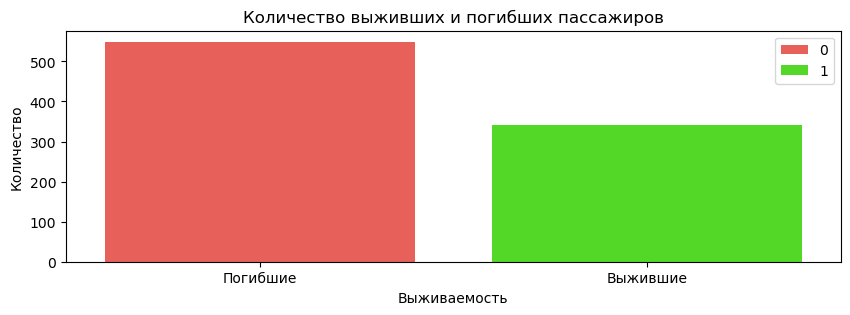

In [64]:
plt.figure(figsize=(10, 3))
sns.countplot(x='Survived', data=df,  hue='Survived', palette=['#ff4a42', '#46f609'])
plt.xticks([0, 1], ['Погибшие', 'Выжившие'])
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.title('Количество выживших и погибших пассажиров')
plt.legend()

**Вывод:** 

График наглядно показывает преобладание погибших над выжившими. Погибших больше примерно на треть. Это создает несбалансированность данных для моделирования.
Требует особых метрик. accuracy недостаточна, нужны precision, recall, F1

***4. Пол и выживаемость***

Возможно в зависимости от пола прассажира увеличивается\уменьшается шанс выжить

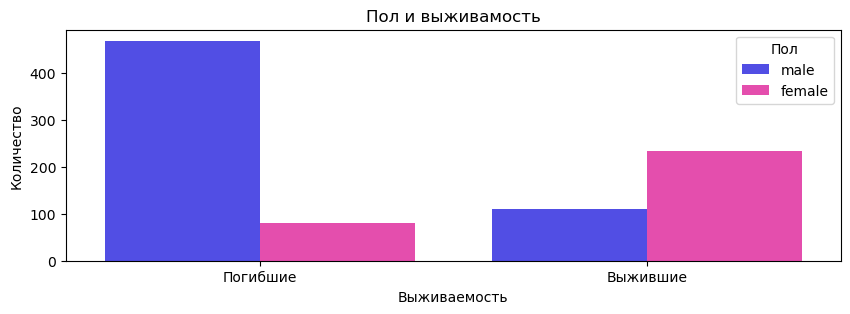

In [13]:
plt.figure(figsize=(10, 3))
sns.countplot(x='Survived', data=df, hue='Sex', palette=['#3935fd','#fd35b4'])
plt.title('Пол и выживамость')
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Погибшие', 'Выжившие'])
plt.legend(title='Пол')

**Вывод:**
1. Среди погибших преобладают пассажиры мужского пола. Их численность превышает количество погибших женщин примерно в пять раз, что свидетельствует о крайне низкой выживаемости мужчин.
2. Среди выживших  женщин оказалось в два раза больше, чем мужчин. Это указывает на более высокие шансы спастись у пассажиров женского пола.

Чаще всего в чрезвычайных ситуациях первыми эвакуируют женщин и детей.
Полученные данные подтверждают, что политика спасения, проводившаяся на "Титанике", имела выраженный гендерный характер и оказала влияние на демографический состав выживших.

***5. Класс и выживаемость***

Возможно пассажирам менее привелегированным было труднее выжить

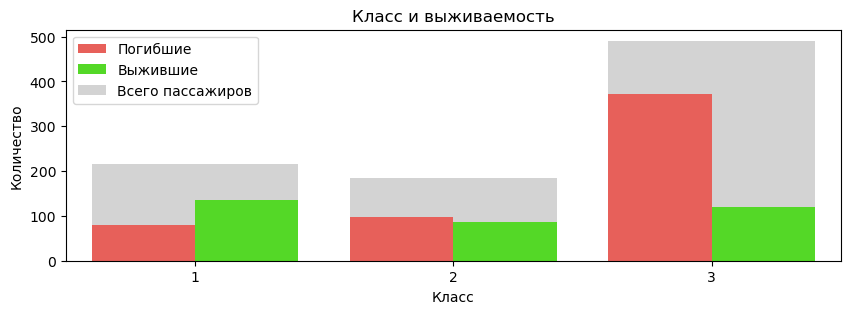

In [14]:
plt.figure(figsize=(10,3))
sns.countplot(x='Pclass', data=df, color='lightgray', label='Всего пассажиров')
sns.countplot(x='Pclass', hue='Survived', data=df, palette=['#ff4a42', '#46f609'])
plt.title('Класс и выживаемость')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(['Погибшие', 'Выжившие', 'Всего пассажиров'])

**Вывод:**

Наиболее многочисленной группой на борту являлись пассажиры третьего класса. Количества пассажиров первого и второго классов были сопоставимы между собой, но значительно уступали третьему классу.
Наблюдается чёткая зависимость между классом обслуживания и шансом на спасение.
- В третьем классе подавляющее большинство пассажиров не смогли спастись.
- Во втором классе наблюдается примерный паритет между численностью выживших и погибших.
- В первом классе количество выживших  превышает количество погибших. Разница достигает значительной величины - выживших примерно на треть больше.
Это демонстрирует, что класс обслуживания как показатель социально-экономического статуса являлся одним из ключевых факторов

***6. Возраст и выживаемость***

Text(0, 0.5, 'Количество')

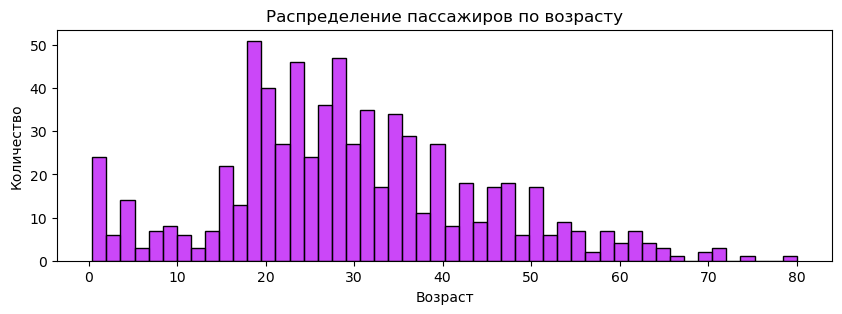

In [14]:
plt.figure(figsize=(10, 3))
sns.histplot(df['Age'].dropna(), bins=50, color='#ba09f6', kde=False)
plt.title('Распределение пассажиров по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')

**Вывод:**

Наиболее многочисленной категорией среди пассажиров были люди в возрасте от 18 до 35 лет. Эта группа составляет демографическое большинство на борту. Из исторического контекста. многие из них были экономически активными мигрантами, эмигрировавшими в поисках работы и новых возможностей в Америке. Это также объясняет высокую долю пассажиров третьего класса 

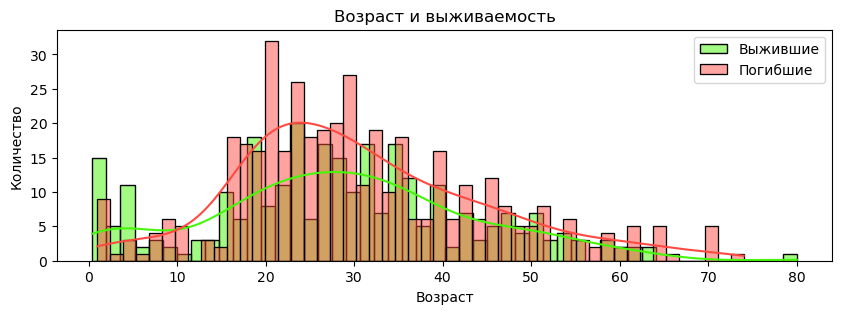

In [15]:
plt.figure(figsize=(10, 3))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=50, color='#46f609', label='Выжившие', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=50, color='#ff4a42', label='Погибшие', kde=True)
plt.title('Возраст и выживаемость')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()

**Вывод:**
1. Только в одной категории пассажиров - дети до 10 лет, количество выживших превышает количество погибших. Подтверждает принцип "женщины и дети первыми", который наиболее последовательно применялся именно к младшей возрастной группе.
2. Максимальный разрыв между численностью погибших и выживших наблюдается в группе от 16 до 30 лет. Именно в этом возрасте сосредоточено наибольшее количество жертв. Это объясняется несколькими факторами:
   - Данная группа была самой многочисленной среди пассажиров
   - Большинство мужчин в этом возрасте были пассажирами третьего класса
   - Молодые мужчины не имели приоритета при эвакуации

Возраст оказался значимым фактором выживаемости не сам по себе, а во взаимодействии с другими переменными - полом и классом обслуживания. Молодые взрослые мужчины, особенно из третьего класса, имели наименьшие шансы на спасение.

***7. Корреляция признаков с выживаемостью***

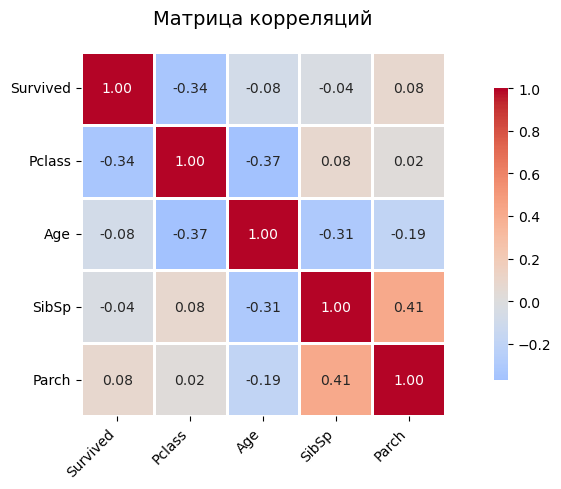

In [65]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()  
plt.figure(figsize=(10, 5)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,fmt='.2f',square=True,linewidths=1,cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

**Вывод:**

Матрица корреляций показывает, что наибольшую связь с выживаемостью пассажиров оказывает класс обслуживания `Pclass`. Корреляция между `Survived` и `Pclass` составляет около −0.34, что указывает на умеренную отрицательную зависимость. Пассажиры более дорогого класса имели существенно более высокие шансы на выживание. 

Возраст `Age` имеет слабую отрицательную корреляцию с выживаемостью (≈ −0.08). сам по себе возраст не являлся определяющим фактором, хотя более молодые пассажиры имели небольшое преимущество.

Признаки, связанные с семьёй `SibSp` и `Parch`, демонстрируют очень слабую корреляцию с целевой переменной. Это означает, что наличие братьев/сестёр или родителей/детей на борту в линейном виде почти не объясняет выживаемость. При этом между `SibSp` и `Parch` наблюдается умеренная положительная корреляция (≈ 0.41), что логично, так как оба признака отражают размер семьи.

В целом, корреляционный анализ показывает, что ни один из признаков не имеет сильной линейной связи с выживаемостью, за исключением Pclass.

***8. Создание новых признаков***

In [67]:
df_fe = df.copy() # копия, чтобы не трогать основной датасет
df_fe['FamilySize'] = df_fe['SibSp'] + df_fe['Parch'] + 1 
df_fe['IsAlone'] = (df_fe['FamilySize'] == 1).astype(int) 
df_fe['MinorAge'] = (df_fe['Age'] < 18).astype(int) 
df_fe['MaleRisk'] = ((df_fe['Sex'] == 'male') & (df_fe['Pclass'] == 3) & (df_fe['Age'] >= 16) & (df_fe['Age'] <= 45) & (df_fe['IsAlone'] == 1)).astype(int)

Были добавлены признаки, отражающие социальные и демографические факторы, которые могли влиять на вероятность выживания пассажиров.
- Признак `FamilySize` характеризует размер семьи пассажира на борту и позволяет учитывать влияние наличия родственников.
- На его основе был создан бинарный признак `IsAlone`, показывающий, путешествовал ли пассажир в одиночку, что потенциально снижало шансы на выживание.
- Признак `MinorAge` выделяет несовершеннолетних пассажиров, поскольку исторически дети имели приоритет при эвакуации.
- Также был добавлен составной признак `MaleRisk`, который описывает группу пассажиров с потенциально повышенным риском гибели.Это взрослые мужчины третьего класса, путешествующие в одиночку. Признак отражает нелинейное взаимодействие пола, возраста, класса и семейного статуса, которое не выявляется простым корреляционным анализом.

***9. Корелляция новых признаков***

In [68]:
new_features = ['IsAlone', 'FamilySize', 'MinorAge', 'MaleRisk']
target = 'Survived'
corr = df_fe[new_features + [target]].corr()[target].sort_values(ascending=False)
print(corr)

Survived      1.000000
MinorAge      0.122239
FamilySize    0.016639
IsAlone      -0.203367
MaleRisk     -0.232278
Name: Survived, dtype: float64


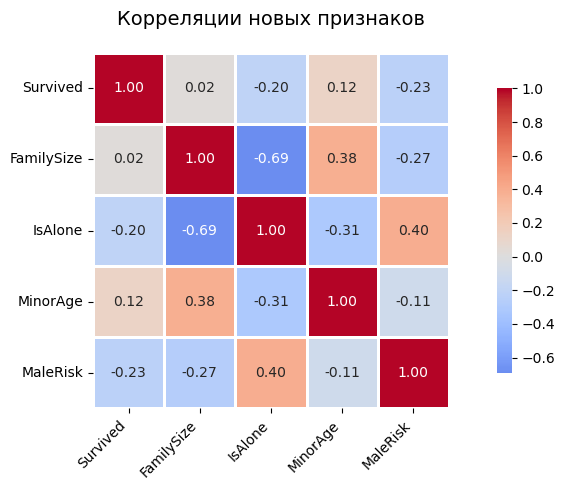

In [69]:
numeric_df = df_fe[['Survived','FamilySize', 'IsAlone', 'MinorAge', 'MaleRisk']]
correlation_matrix = numeric_df.corr()  
plt.figure(figsize=(10, 5)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,fmt='.2f',square=True,linewidths=1,cbar_kws={"shrink": 0.8})
plt.title('Корреляции новых признаков', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

**Вывод:**

Наиболее заметное влияние на выживаемость оказывают признаки с отрицательной корреляцией `MaleRisk` (−0.23) и `IsAlone` (−0.20). Одинокие взрослые мужчины третьего класса выживали реже. Признак `MinorAge` имеет положительную связь с выживаемостью (0.12), что подтверждает приоритет детей при эвакуации. `FamilySize` практически не коррелирует напрямую с выживаемостью (0.02), однако сильно связан с `IsAlone`, что указывает на косвенное влияние размера семьи через одиночество пассажира.

***10. Преобразование данных перед обучением***

In [20]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   FamilySize  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   MinorAge    891 non-null    int64  
 9   MaleRisk    891 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 69.7+ KB


In [21]:
df_fe.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
FamilySize      0
IsAlone         0
MinorAge        0
MaleRisk        0
dtype: int64

In [70]:
df_fe['Age'] = df_fe['Age'].fillna(df_fe['Age'].median()) # заполнение пропусков в возрасте медианным значением
df_fe['Sex'] = df_fe['Sex'].map({'male': 0, 'female': 1}) # преобразование категориального признака (пол пассажира) в бинарный числовой (0\1)
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   FamilySize  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   MinorAge    891 non-null    int64  
 9   MaleRisk    891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [71]:
df_fe.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
FamilySize    0
IsAlone       0
MinorAge      0
MaleRisk      0
dtype: int64

Также чтобы избежать дублирования кода при построении и оценке моделей, выношу в этот раздел функцию для  расчёта всех метрик и списки признаков - единые наборы фичей для всех экспериментов.

In [72]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'] # изначальные признаки
new_features = ['FamilySize', 'IsAlone', 'MinorAge', 'MaleRisk'] # новые признаки
target = 'Survived' # целевая переменная

In [74]:
def print_metrics(y_true, y_pred_class, y_pred_prob):
    loss = log_loss(y_true, y_pred_prob)
    accuracy = accuracy_score(y_true, y_pred_class)
    precision = precision_score(y_true, y_pred_class)
    recall = recall_score(y_true, y_pred_class)
    f1 = f1_score(y_true, y_pred_class)
    cm = confusion_matrix(y_true, y_pred_class)

    print("Метрики модели:")
    print(f"Loss: {loss:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("\nМатрица ошибок:")
    print(f"TN: {cm[0,0]}  FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]}  TP: {cm[1,1]}")

***11. Метрики***


Для оценки качества моделей бинарной классификации используются следующие метрики.

- **Log Loss (Binary Cross-Entropy)**
Или функция потерь. Метрика, количественно оценивающая разницу между предсказанием модели и истинными данными.Оценивает качество вероятностных предсказаний модели.
Чем меньше значение, тем лучше модель калибрует вероятности.
Идеальное значение стремится к 0. Большие значения указывают на уверенные ошибки модели. BCE (Binary Cross Entropy) применяется, когда задача имеет два возможных ответа - например, да или нет.

- **Accuracy**
показывает долю корректных предсказаний от общего числа наблюдений. Значения лежат в диапазоне от 0 до 1. Чем ближе accuracy к 1, тем выше общая точность модели.
Метрика чувствительна к дисбалансу классов и не должна использоваться изолированно.

- **Precision**
отражает долю корректных положительных предсказаний среди всех предсказанных положительных классов. Чем выше precision, тем меньше ложных срабатываний (False Positive).Максимальное значение - 1.
Важно в задачах, где ошибочное отнесение объекта к положительному классу нежелательно.

- **Recall (Sensitivity, True Positive Rate)**
показывает долю объектов положительного класса, которые модель смогла правильно обнаружить. Чем выше recall, тем меньше пропущенных положительных объектов (False Negative).Максимальное значение - 1.
Важна в задачах, где важно не пропустить положительный класс (в данной задаче - выживших).

- **F1-score**
является гармоническим средним между precision и recall. Значения лежат в диапазоне от 0 до 1. Чем выше F1-score, тем лучше баланс между точностью и полнотой.
Метрика особенно полезна при несбалансированных классах.

- **Confusion Matrix**
Матрица ошибок не имеет единого лучшего значения, но используется для интерпретации результатов.
Желательно:
1. высокие значения TP (True Positive) и TN (True Negative),
2. низкие значения FP (False Positive) и FN (False Negative).

***11. Обучение модели без новых признаков***

Для анализа эффективности новых признаков необходимо сравнить результаты моделей, обученных на разных наборах признаков. Ниже модень логистической регрессии, использующей только исходные признаки. Этот эксперимент позволит количественно оценить вклад новых признаков в качество предсказаний.результаты воспроизводимы - если запустить код заново, цифры не изменятся. В реальных задачах логистическая регрессия часто используется как первая модель. Если новые признаки не улучшают даже её, то вряд ли они помогут более сложным алгоритмам..

In [18]:
X = df_fe[features]  
y = df_fe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg_1 = LogisticRegression(solver='liblinear', random_state=42,max_iter=1000)
log_reg_1.fit(X_train, y_train)

y_pred_prob_1 = log_reg_1.predict_proba(X_test)[:, 1]
y_pred_class_1 = log_reg_1.predict(X_test)
print_metrics(y_test, y_pred_class_1, y_pred_prob_1)

Метрики модели:
Loss: 0.46
Accuracy: 0.79
Precision: 0.76
Recall: 0.68
F1-score: 0.72

Матрица ошибок:
TN: 95  FP: 15
FN: 22  TP: 47


***12. Обучение модели с новыми признаками***

In [19]:
X = df_fe[features + new_features]  
y = df_fe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg_2 = LogisticRegression(solver='liblinear', random_state=42,max_iter=1000)
log_reg_2.fit(X_train, y_train)

y_pred_prob_2 = log_reg_2.predict_proba(X_test)[:, 1]
y_pred_class_2 = log_reg_2.predict(X_test)
print_metrics(y_test, y_pred_class_2, y_pred_prob_2)

Метрики модели:
Loss: 0.44
Accuracy: 0.81
Precision: 0.79
Recall: 0.70
F1-score: 0.74

Матрица ошибок:
TN: 97  FP: 13
FN: 21  TP: 48


**Вывод:**

Добавление новых признаков привело к улучшению качества модели логистической регрессии.
По сравнению с моделью, обученной только на исходных признаках, наблюдается рост метрик:

- Accuracy увеличилась с 0.79 до 0.81, что говорит об общем повышении точности классификации;
- F1-score вырос с 0.72 до 0.74, что указывает на лучший баланс между точностью (Precision) и полнотой (Recall);
- Precision(0,76-0,79) и Recall(0,68 - 0,7) также показали положительную динамику, что означает более корректное выявление выживших пассажиров без существенного роста ложных срабатываний;
- Значение Loss уменьшилось (0.46-0.44), что свидетельствует о более уверенных и калиброванных вероятностных предсказаниях модели.

Но все же показатели незначительно увеличились. Возможно для дальнейшего развития требуется создание более сложных признаков.

***13. Важность новых признаков***

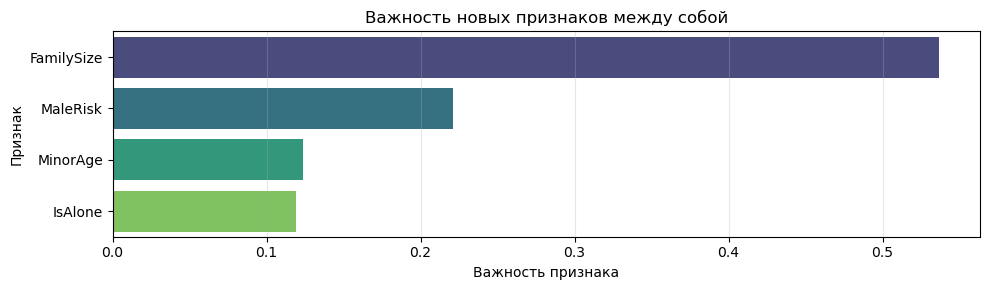

In [30]:
plt.figure(figsize=(10,3))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature',  palette='viridis', legend=False)
plt.title('Важность новых признаков между собой')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

In [31]:
X = df_fe[features + new_features]  
y = df_fe[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [32]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10,min_samples_split=10)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

      Feature  Importance
1         Sex    0.441852
2         Age    0.229297
0      Pclass    0.155929
5  FamilySize    0.065767
3       SibSp    0.036481
4       Parch    0.024070
8    MaleRisk    0.016788
7    MinorAge    0.015040
6     IsAlone    0.014776


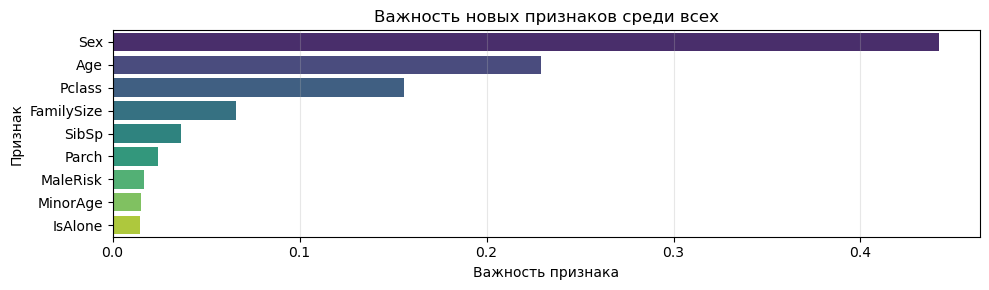

In [33]:
plt.figure(figsize=(10,3))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature',  palette='viridis', legend=False)
plt.title('Важность новых признаков среди всех')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

Новые признаки показали низкую важность по сравнению с основными факторами. 
FammilySize, MaleRisk, MinorAge, IsAlone показали низкую важность по сравнению с основными факторами - Sex, Age, Pclass.
Три главных признака дают 83% информации:

- Пол (44%) - женщины спасались чаще

- Возраст (23%) - дети имели приоритет

- Класс (16%) - богатые были ближе к шлюпкам

Почему новые признаки слабы:
FamilySize - 6%
MaleRisk - 1,7%
MinorAge - 1,5%
IsAlone - 1,4%
Дублируют старые (FamilySize = SibSp + Parch). Затеняются сильными признаками (пол настолько важен, что остальное кажется незначительным)
Для Titanic достаточно пола, возраста и класса, чтобы хорошо предсказывать выживаемость. Новые признаки добавляют немного точности, но не являются критичными. 

***Сравнение моделей***

In [75]:
X = df_fe[features + new_features]  
y = df_fe[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler() # Создание экземпляра StandardScaler для нормализации признаков
X_train_scaled = scaler.fit_transform(X_train) # Нормализация признаков, вычисляется среднее и стандартное отклонение на обучающей выборке
X_test_scaled = scaler.transform(X_test) # Применение нормализации к тестовой выборке на основе параметров обучающей выборки

***14. Модель дерева (Random Forest Classifier)***

In [24]:
model_1 = RandomForestClassifier(
    max_depth=10, # Максимальная глубина каждого дерева (ограничение сложности)
    n_estimators=1000, # Количество деревьев в лесу (больше = стабильнее, но медленнее)
    min_samples_split=5, # Минимальное количество образцов для разделения узла
    min_samples_leaf=2, # Минимальное количество образцов в листе
    random_state=42 # Для воспроизводимости результатов
)
# Модель строит 1000 деревьев решений, каждое учится на случайной подвыборке данных и признаков
model_1.fit(X_train_scaled, y_train)
# Получение вероятностей предсказаний (для класса "выжил" - Survived=1)
y_pred_prob_1 = model_1.predict_proba(X_test_scaled)[:, 1]  # вероятности класса 1
y_pred_class_1 = model_1.predict(X_test_scaled)  # предсказанные классы
print_metrics(y_test, y_pred_class_1, y_pred_prob_1)

Метрики модели:
Loss: 0.44
Accuracy: 0.82
Precision: 0.79
Recall: 0.71
F1-score: 0.75

Матрица ошибок:
TN: 97  FP: 13
FN: 20  TP: 49


***15. Модель градиентного бустинга (Gradient Boosting Classifier).***

In [82]:
model_21 = GradientBoostingClassifier(
    learning_rate=0.01,  # Скорость обучения (маленький шаг = более точная настройка)
    n_estimators=150, # Количество деревьев (больше деревьев = больше итераций бустинга)
    max_depth=5, # Максимальная глубина каждого дерева
    min_samples_split=5, # Минимальное число образцов для разделения узла
    min_samples_leaf=2,  # Минимальное число образцов в листе
    random_state=42
)
# Процесс: последовательное построение деревьев, каждое новое дерево учится на ошибках предыдущего
model_21.fit(X_train, y_train)
# Получение вероятностей предсказаний (для класса "выжил" - Survived=1)
y_pred_prob_2 = model_21.predict_proba(X_test)[:,1]  # вероятности класса 1
y_pred_class_2 = model_21.predict(X_test)  # классы
print_metrics(y_test, y_pred_class_2, y_pred_prob_2)

Метрики модели:
Loss: 0.66
Accuracy: 0.77
Precision: 0.69
Recall: 0.72
F1-score: 0.71

Матрица ошибок:
TN: 88  FP: 22
FN: 19  TP: 50


In [29]:
model_2 = GradientBoostingClassifier(
    learning_rate=0.01,  # Скорость обучения (маленький шаг = более точная настройка)
    n_estimators=1000, # Количество деревьев (больше деревьев = больше итераций бустинга)
    max_depth=10, # Максимальная глубина каждого дерева
    min_samples_split=5, # Минимальное число образцов для разделения узла
    min_samples_leaf=2,  # Минимальное число образцов в листе
    random_state=42
)
# Процесс: последовательное построение деревьев, каждое новое дерево учится на ошибках предыдущего
model_2.fit(X_train_scaled, y_train)
# Получение вероятностей предсказаний (для класса "выжил" - Survived=1)
y_pred_prob_2 = model_2.predict_proba(X_test_scaled)[:,1]  # вероятности класса 1
y_pred_class_2 = model_2.predict(X_test_scaled)  # классы
print_metrics(y_test, y_pred_class_2, y_pred_prob_2)

Метрики модели:
Loss: 0.35
Accuracy: 0.84
Precision: 0.83
Recall: 0.72
F1-score: 0.78

Матрица ошибок:
TN: 100  FP: 10
FN: 19  TP: 50


***17. Линейная модель логистичесской регрессии (Logistic Regression)***

In [32]:
model_31 = LogisticRegression(
    solver='liblinear', # Оптимизатор, хорошо подходит для небольших датасетов
    random_state=42,
    class_weight='balanced',# Компенсация дисбаланса классов (выжившие / погибшие)
    max_iter=500  # Максимальное число итераций для сходимости
)

model_31.fit(X_train_scaled, y_train)
# Получение вероятностей предсказаний (для класса "выжил" - Survived=1)
y_pred_prob_31 = model_31.predict_proba(X_test_scaled)[:, 1]
# predict_proba возвращает вероятность от 0 до 1

# Оптимизация порога для F1
thresholds = np.arange(0.1, 0.9, 0.01) # диапазон возможных порогов
f1_scores = []
# Для каждого порога считаем F1-score
for t in thresholds:
    y_pred_class = (y_pred_prob_31 >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_class))

best_idx = np.argmax(f1_scores) # Индекс лучшего порога
best_threshold = thresholds[best_idx]
#print(f"оптимальный порог для F1: {best_threshold:.2f}")

# Предсказания с оптимальным порогом
y_pred_class_31 = (y_pred_prob_31 >= best_threshold).astype(int)

print_metrics(y_test, y_pred_class_31, y_pred_prob_31)

Оптимальный порог для F1: 0.37
Метрики модели:
Loss: 0.54
Accuracy: 0.73
Precision: 0.63
Recall: 0.72
F1-score: 0.68

Матрица ошибок:
TN: 81  FP: 29
FN: 19  TP: 50


***14. Нейронная сеть***

/home/c3b5200f-e863-4fe6-a0d9-f598d2687c38/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.4868 - loss: 0.7108 - val_accuracy: 0.7692 - val_loss: 0.6325
Epoch 2/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7750 - loss: 0.6030 - val_accuracy: 0.7762 - val_loss: 0.5746
Epoch 3/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7821 - loss: 0.5397 - val_accuracy: 0.7692 - val_loss: 0.5269
Epoch 4/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8014 - loss: 0.4994 - val_accuracy: 0.7832 - val_loss: 0.4979
Epoch 5/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7909 - loss: 0.4783 - val_accuracy: 0.7902 - val_loss: 0.4802
Epoch 6/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8155 - loss: 0.4434 - val_accuracy: 0.8042 - val_loss: 0.4727
Epoch 7/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8278 - loss: 0.4403 - val_accuracy: 0.8112 - val_loss: 0.4712
Epoch 8/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8225 - loss: 0.4215 - val_accuracy: 0.7832 - v

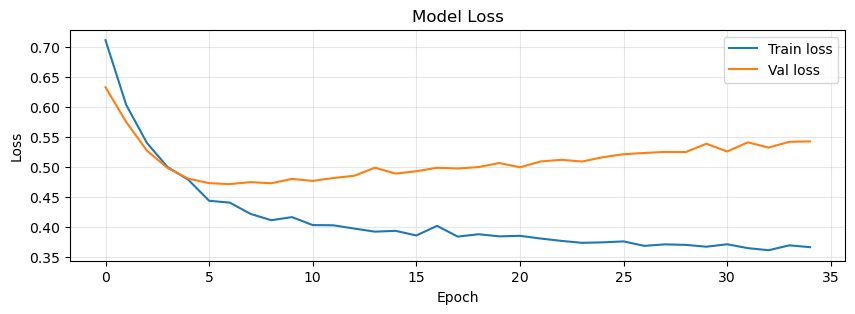

In [51]:
model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# Dense = полносвязный слой (каждый нейрон связан со всеми входами)
# activation='relu' - функция активации Rectified Linear Unit (f(x)=max(0,x))
# input_shape=(X_train.shape[1],) - количество входных признаков
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(16, activation='relu'))
model_4.add(Dropout(0.2)) # Dropout для борьбы с переобучением. 20% нейронов случайно отключаются на каждой итерации
model_4.add(Dense(1, activation='sigmoid')) # Выходной слой (1 нейрон для бинарной классификации). activation='sigmoid' преобразует выход в вероятность от 0 до 1

model_4.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])
# optimizer=Adam(learning_rate=0.001) - алгоритм оптимизации с learning rate 0.001
# loss='binary_crossentropy' - функция потерь для бинарной классификации
# metrics=['accuracy'] - метрика для мониторинга (точность)
history = model_4.fit(X_train_scaled, y_train, epochs = 35, batch_size = 32, validation_split = 0.2)

y_pred_prob_4 = model_4.predict(X_test_scaled, verbose=0)  
y_pred_class_4 = (y_pred_prob_4 > 0.5).astype(int)   
print_metrics(y_test, y_pred_class_4, y_pred_prob_4)

plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

/home/c3b5200f-e863-4fe6-a0d9-f598d2687c38/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 153ms/step - accuracy: 0.6696 - loss: 0.6480 - val_accuracy: 0.6923 - val_loss: 0.6110 - learning_rate: 0.0030
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7364 - loss: 0.5518 - val_accuracy: 0.7552 - val_loss: 0.5659 - learning_rate: 0.0030
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7610 - loss: 0.5251 - val_accuracy: 0.7762 - val_loss: 0.5387 - learning_rate: 0.0030
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8102 - loss: 0.4794 - val_accuracy: 0.7832 - val_loss: 0.5208 - learning_rate: 0.0030
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7944 - loss: 0.4847 - val_accuracy: 0.7972 - val_loss: 0.5148 - learning_rate: 0.0030
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7873 - loss: 0.4681 - val_accuracy: 0.8042 - val_loss: 0.4896 - learning_rate: 0.0030
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8032 - loss: 0.4693 - val_a

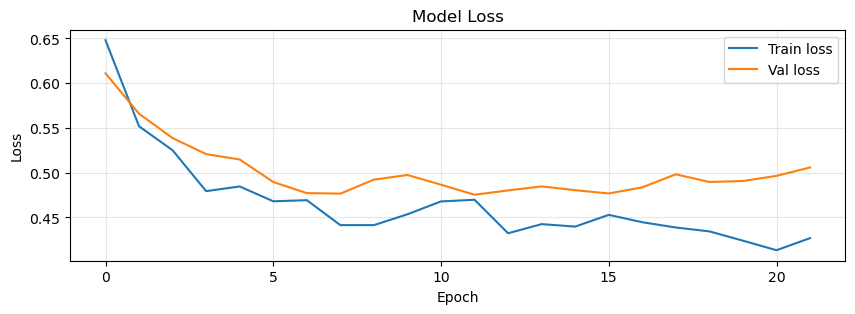

In [53]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train) # добавлена балансировка классов, теперь модель учитывает дисбаланс данных т.к. погибших больше чем выживших
class_weight_dict = dict(enumerate(class_weights))


def build_model(input_dim): # увеличена глубина сети. теперь 4 слоя, первый на 128 нейронов. больше ёмкости, чтобы лучше находить сложные взаимосвязи
    model = Sequential([
        Dense(128, input_dim=input_dim), BatchNormalization(), Activation('relu'), Dropout(0.4),
        Dense(64), BatchNormalization(), Activation('relu'), Dropout(0.3),
        Dense(32), BatchNormalization(), Activation('relu'), Dropout(0.2),
        Dense(16), BatchNormalization(), Activation('relu'), Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.003), loss='binary_crossentropy', metrics=['accuracy'])  # 0.003 вместо 0.001 в первой модели более высокий learning rate ускоряет обучение,
    
    return model


model = build_model(X_train_scaled.shape[1])

callbacks = [
    # EarlyStopping останавливает обучение, если качество на валидации не улучшается
    # patience=10 10 эпох без улучшений
    # restore_best_weights=True возвращаем веса из лучшей эпохи
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=1)
    # Автоматически уменьшает learning rate при застое в обучении
    # factor=0.5 уменьшает LR в 2 раза
    # patience=6 6 эпох без улучшений
    # min_lr=1e-6 минимальный learning rate
    # Помогает точнее сходиться к минимуму функции потерь
]

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, class_weight=class_weight_dict, callbacks=callbacks, verbose=1)

y_pred_prob = model.predict(X_test_scaled, verbose=0).flatten()
y_pred_class = (y_pred_prob > 0.5).astype(int)
print_metrics(y_test, y_pred_class, y_pred_prob)

plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

**Вывод**

Random Forest
- F1: 0.75
- Accuracy: 0.82
- Loss: 0.44

Gradient Boosting
- F1: 0.78 - наивысший
- Accuracy: 0.84 - наивысший
- Loss: 0.35 - наименьший

Logistic Regression
- F1: 0.68
- Accuracy: 0.73
- Loss: 0.54

Нейронная сеть
- F1: 0.75
- Accuracy: 0.78
- Loss: 0.45

Gradient Boosting показал наилучшие результаты по F1-score, accuracy и loss.
Кроме того, у Gradient Boosting наилучшая матрица ошибок. Там наименьшее количество ложных положительных (FP=10) и ложных отрицательных (FN=19) ошибок и наибольшее количество истинных отрицательных (TN=100) и истинных положительных (TP=50). Поэтому для дальнейшей кросс-валидации выбираю Gradient Boosting Classifier.

***15. Кросс-валидация на 5 фолдах***

In [98]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_metrics = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n Fold {fold}")
    
    X_train_fold = X.iloc[train_idx] if hasattr(X, 'iloc') else X[train_idx]
    y_train_fold = y.iloc[train_idx] if hasattr(y, 'iloc') else y[train_idx]
    
    X_test_fold  = X.iloc[test_idx]  if hasattr(X, 'iloc') else X[test_idx]
    y_test_fold  = y.iloc[test_idx]  if hasattr(y, 'iloc') else y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled  = scaler.transform(X_test_fold)
    sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train_fold)

    model = GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.01,
        random_state=42,
        max_depth=5,          
        min_samples_split=5,    
        min_samples_leaf=2)
                             
    model.fit(X_train_scaled, y_train_fold, sample_weight=sample_weights)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_pred_prob > 0.5).astype(int)   

    print("Classification Report:")
    print(classification_report(y_test_fold, y_pred, digits=4))
    
    cm = confusion_matrix(y_test_fold, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Confusion Matrix:")
    print(f"TN: {tn:3d}  FP: {fp:3d}")
    print(f"FN: {fn:3d}  TP: {tp:3d}")


 Fold 1
Classification Report:
              precision    recall  f1-score   support

           0     0.8468    0.8545    0.8507       110
           1     0.7647    0.7536    0.7591        69

    accuracy                         0.8156       179
   macro avg     0.8058    0.8041    0.8049       179
weighted avg     0.8152    0.8156    0.8154       179

Confusion Matrix:
TN:  94  FP:  16
FN:  17  TP:  52

 Fold 2
Classification Report:
              precision    recall  f1-score   support

           0     0.8362    0.8818    0.8584       110
           1     0.7903    0.7206    0.7538        68

    accuracy                         0.8202       178
   macro avg     0.8133    0.8012    0.8061       178
weighted avg     0.8187    0.8202    0.8185       178

Confusion Matrix:
TN:  97  FP:  13
FN:  19  TP:  49

 Fold 3
Classification Report:
              precision    recall  f1-score   support

           0     0.8174    0.8545    0.8356       110
           1     0.7460    0.6912    

'\n    model = GradientBoostingClassifier(\n    n_estimators=150,\n    learning_rate=0.08,\n    max_depth=4,\n    random_state=42\n    # ← class_weight убираем полностью\n)\n'

**Вывод**

Средняя точность модели составляет приблизительно 0.81, что подтверждает ранее полученный результат на тестовой выборке. Значения метрик на разных фолдах показывают умеренную вариативность. Точность колеблется от 0.79 до 0.82, что свидетельствует об устойчивости модели к различным разбиениям данных.

Анализ метрик по классам выявляет что модель лучше предсказывает класс 0 (погибшие) по сравнению с классом 1 (выжившие). Precision для класса 0 составляет в среднем 0.84 против 0.75 для класса 1. Аналогичная разница наблюдается в recall и F1-score. 
Матрицы ошибок на всех фолдах демонстрируют сходную структуру.Количество ложноположительных прогнозов (FP) варьируется от 13 до 24, ложноотрицательных (FN)  от 13 до 21. Наилучший баланс между ошибками первого и второго рода наблюдается на втором фолде.

***16. Вывод по всей работе***

Были проведены следующие этапы:

- Предварительный анализ данных с визуализацией.
- Создание новых признаков.
- Построение и сравнение четырех моделей: Random Forest, Gradient Boosting, Logistic Regression и Neural Network.
- Выбор лучшей модели (Gradient Boosting) и ее кросс-валидация на 5 фолдах.

Однако,  модель градиентного бустинга показала умеренные результаты. Средняя точность на кросс-валидации составила около 0.81, при этом метрики для класса выживших (меньшинственный класс) ниже, чем для класса погибших. Наибольшее влияние на предсказание оказывают три основных признака - пол, возраст и класс обслуживания.

Основные проблемы:
- Дисбаланс классов. В данных больше погибших, чем выживших, что усложняет задачу.
- Небольшой объем выборки - около 900 примеров и отсутствие сильных признаков, коррелирующих с целевой переменной.
- Низкая предсказательная способность новых признаков. Созданные признаки (FamilySize, IsAlone и др.) показали низкую важность в модели.

Но модель градиентного бустинга показала себя лучше других, продемонстрировав стабильность на кросс-валидации.

Для улучшения результатов можно:
- Собрать больше данных или использовать аугментацию существующих.
- Менять гиперпараметры моделей
- Провести более глубокий анализ и создать более информативные признаки.

Модель градиентного бустинга является наиболее подходящей для задачи предсказания выживаемости на имеющихся данных. Однако, учитывая  ограниченное количество информативных признаков, существенное улучшение качества моделей без привлечения дополнительных источников информации представляется затруднительным.
